## Loading some libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Exploration

In [2]:
df = pd.read_csv('walmart.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [6]:
# checking the size of the data
df.shape

(550068, 10)

In [3]:
# checking the column names
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [5]:
# checking unique counts of each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Data Info:

- Walmart is a globally recognized retail giant, renowned for offering a wide range of products at competitive prices, and providing a convenient shopping experience for millions of customers worldwide.

- Analyzing this dataset offers valuable insights into Walmart's customer base and purchasing behavior. It reveals details about customer demographics, product preferences, and spending patterns. This comprehensive dataset is a valuable resource for understanding various aspects of Walmart's operations, such as marketing strategies, customer segmentation, and product demand. It can enhance strategic decision-making in areas like inventory management, targeted marketing, and customer relationship management.

#### The datset contains the following columns:

- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation(Masked)
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category (Masked)
- Purchase: Purchase Amount


#### Potential Usecases

- Customer Segmentation
- Market Basket Analysis
- Personalized Marketing
- Demand Forecasting
- Product Recommendation Systems
- Customer Lifetime Value (CLV) Analysis
- Sales and Revenue Analysis
- Urban vs. Rural Analysis
- Occupational Influence on Purchases
- Customer Loyalty Programs
- Marital Status and Shopping Behavior
- Price Sensitivity Analysis
- Optimizing pricing strategies to maximize sales and profitability

## Data Understanding:

- 1. We have 550068 records.
- 2. We have 5891 users
- 3. we have 3631 products
- 4. Major Data types are int64 and object
- 5. No missing values 

In [7]:
# checking the data types of each column
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [8]:
# checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [9]:
# Do we have missing values?

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [53]:
# checking for duplicates
df.duplicated().sum()

0

In [12]:
# sectioning the data into different data types
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

In [13]:
numerical_cols

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

In [14]:
categorical_cols

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

## Univariate Analysis - Checking facts about each column int the dataset. 

We'll be skipping the product and user id for now.

In [15]:
# unique values in the data
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

#### Gender

In [17]:
# counting values in Gender
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

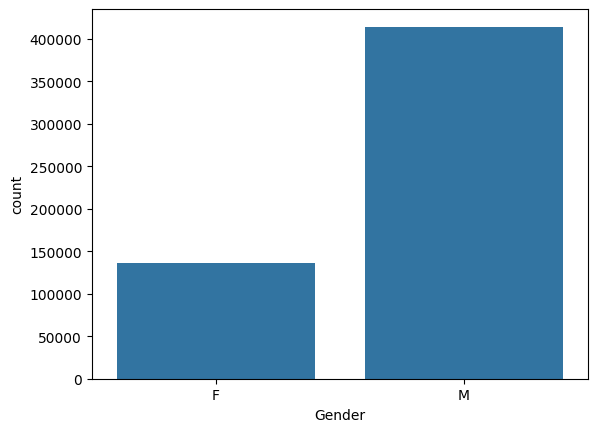

In [19]:
# making countplot for the Gender
sns.countplot(x = df['Gender'])

In [20]:
# calculating the percentage if M to F in Gender
df['Gender'].value_counts(normalize = True)

Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64

#### Age

In [21]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_20400\3564553045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Age'], order = df['Age'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Age', ylabel='count'>

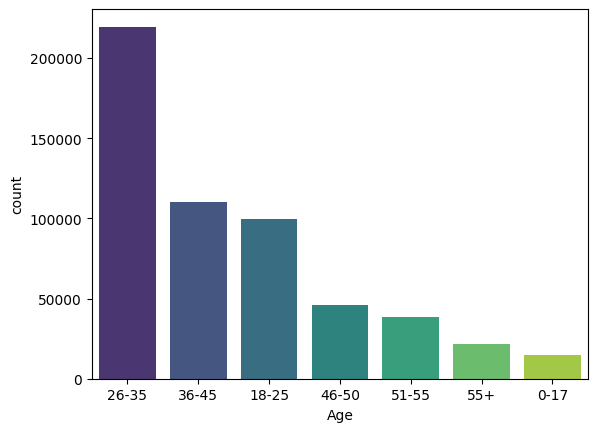

In [29]:
# countplot for Age
sns.countplot(x = df['Age'], order = df['Age'].value_counts().index, palette = 'viridis')

In [30]:
# percentage of each age group
df['Age'].value_counts(normalize = True)

Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, dtype: float64

#### Occupation

In [32]:
df['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_20400\3351876818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Occupation'], order = df['Occupation'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Occupation', ylabel='count'>

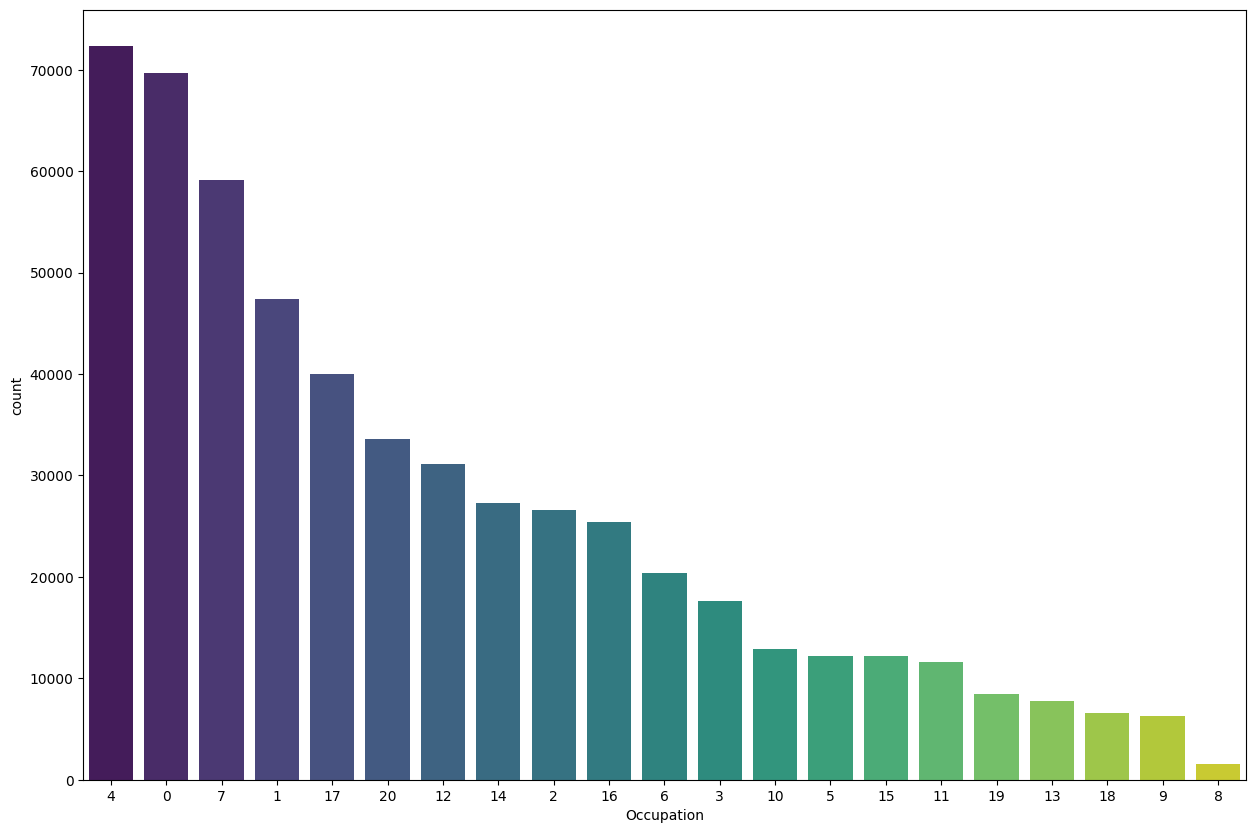

In [34]:
# countplot for Occupation
plt.figure(figsize = (15, 10))

sns.countplot(x = df['Occupation'], order = df['Occupation'].value_counts().index, palette = 'viridis')

In [35]:
# percentage of each occupation
df['Occupation'].value_counts(normalize = True)

Occupation
4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: proportion, dtype: float64

#### City Category

In [36]:
# counting values in City_Category
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_20400\2359335939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['City_Category'], order = df['City_Category'].value_counts().index, palette = 'viridis')


<Axes: xlabel='City_Category', ylabel='count'>

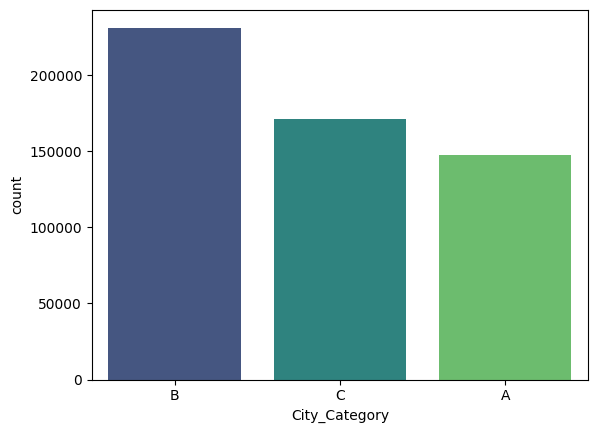

In [37]:
# countplot for City_Category
sns.countplot(x = df['City_Category'], order = df['City_Category'].value_counts().index, palette = 'viridis')

In [38]:
# percentage of each city category
df['City_Category'].value_counts(normalize = True)

City_Category
B    0.420263
C    0.311189
A    0.268549
Name: proportion, dtype: float64

#### Stay In Current City Years

In [39]:
# counting values in Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_20400\266666560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Stay_In_Current_City_Years'], order = df['Stay_In_Current_City_Years'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

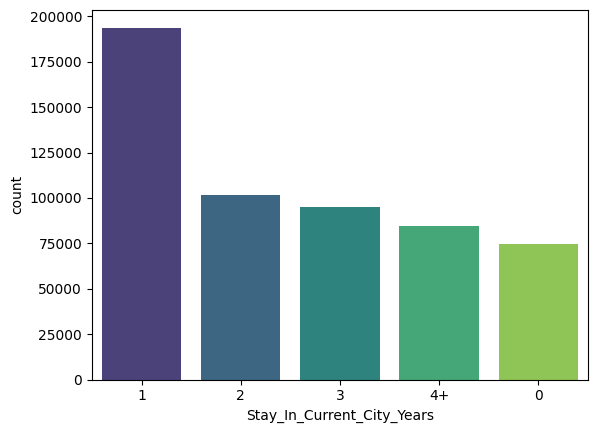

In [40]:
# countplot for Stay_In_Current_City_Years
sns.countplot(x = df['Stay_In_Current_City_Years'], order = df['Stay_In_Current_City_Years'].value_counts().index, palette = 'viridis')

In [41]:
# percentage of each stay in current city years
df['Stay_In_Current_City_Years'].value_counts(normalize = True)

Stay_In_Current_City_Years
1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: proportion, dtype: float64

#### Marital Status

In [42]:
# value counts for Marital_Status
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_20400\3449557410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Marital_Status'], palette = 'viridis')


<Axes: xlabel='Marital_Status', ylabel='count'>

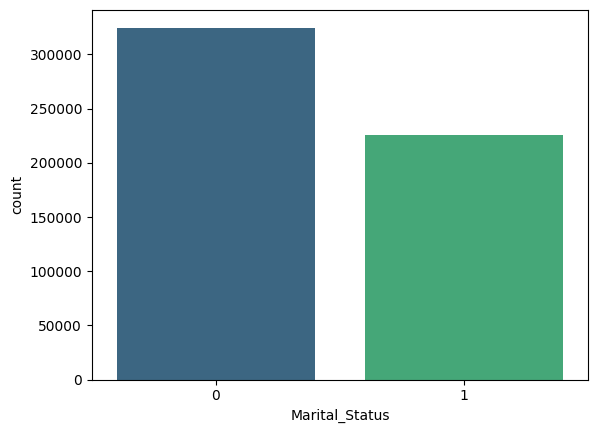

In [43]:
# countplot for Marital_Status
sns.countplot(x = df['Marital_Status'], palette = 'viridis')

In [44]:
# percentage of each marital status
df['Marital_Status'].value_counts(normalize = True)

Marital_Status
0    0.590347
1    0.409653
Name: proportion, dtype: float64

#### Product Category

In [46]:
# value counts for Product_Category
df['Product_Category'].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

C:\Users\timmy\AppData\Local\Temp\ipykernel_20400\110135945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Product_Category'], order = df['Product_Category'].value_counts().index, palette = 'viridis')


<Axes: xlabel='Product_Category', ylabel='count'>

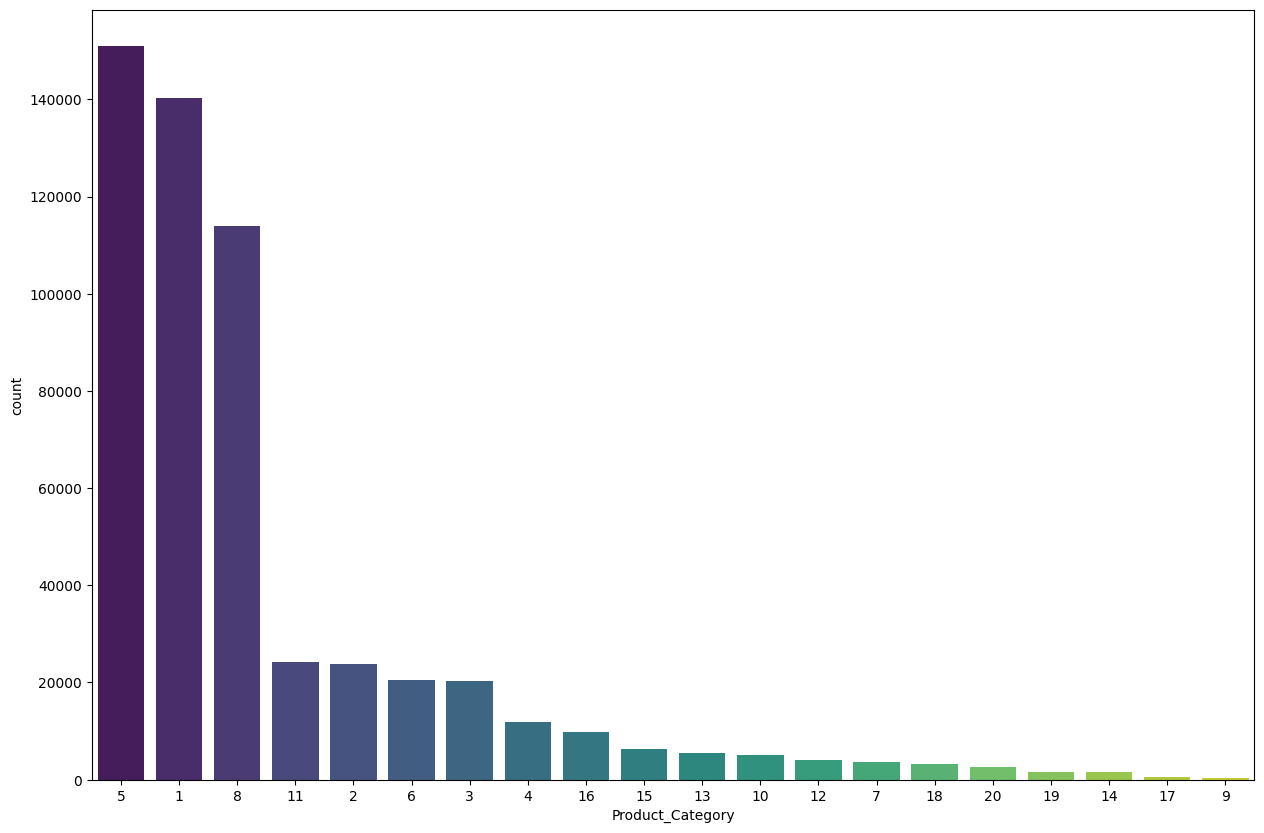

In [47]:
# countplot for Product_Category
plt.figure(figsize = (15, 10))
sns.countplot(x = df['Product_Category'], order = df['Product_Category'].value_counts().index, palette = 'viridis')

In [48]:
# percentage of each product category
df['Product_Category'].value_counts(normalize = True)

Product_Category
5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: proportion, dtype: float64

#### Purchase

In [49]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

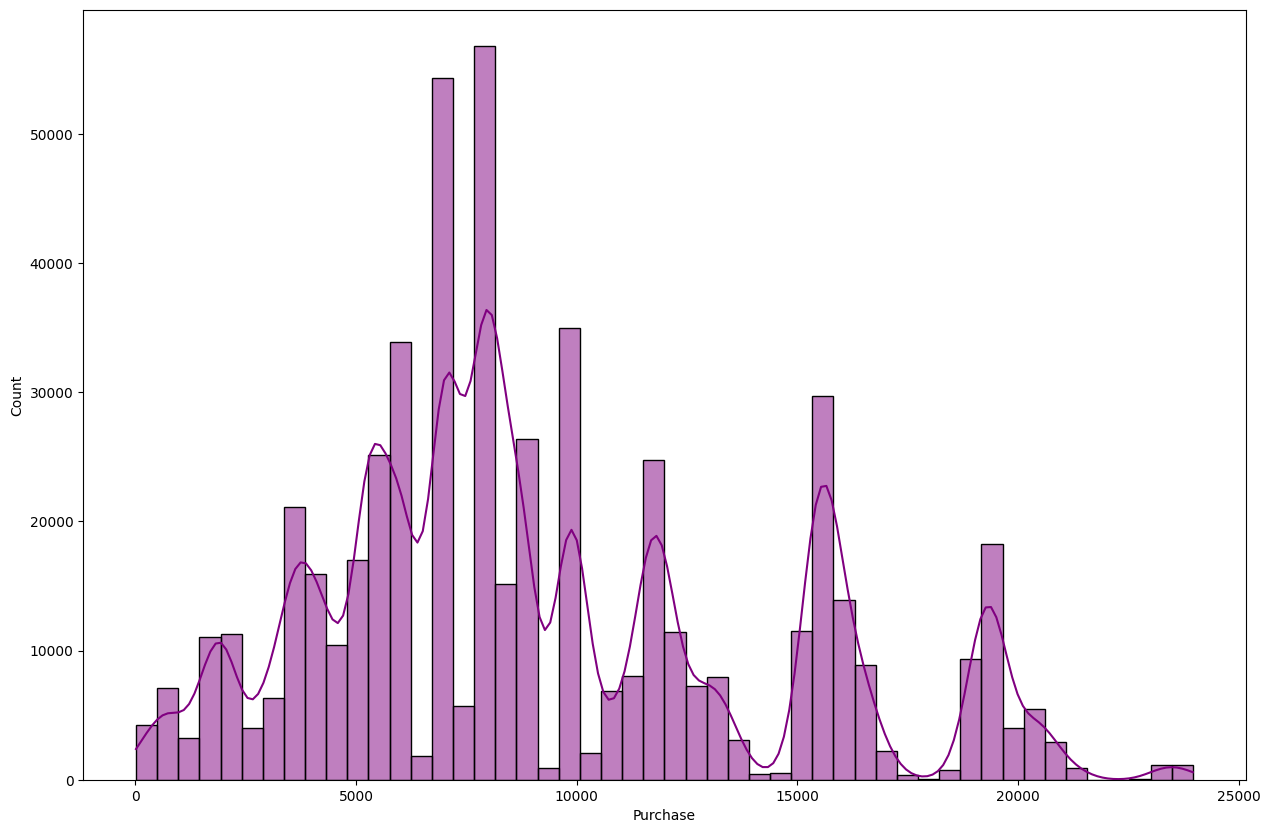

In [50]:
# distribution plot for Purchase
plt.figure(figsize = (15, 10))
sns.histplot(df['Purchase'], bins = 50, kde = True, color = 'purple')

## Data Understanding:

- 1. We have 550068 records.
- 2. We have 5891 users
- 3. we have 3631 products
- 4. Major Data types are int64 and object
- 5. No missing values 
- 6. No Duplicated row in the dataset
- 7. We have more Males visiting Walmart store compared to females. The data consists of 75.3% of Males and 24.7% of Females. 
- 8. A lot of the customes visiting the store are Middle Age - We have 40% of the customers in the Age group of 26-35, 20% for 36-45, and 18.1% for 18-25. This means that 78% of the customers are youths.
- 9. The Occupation groups 4, 0 and 7 appears to have a lot of customers in that category. 
- 10. A lot of the customers are from City B and C. Maybe that's because it's closer to the store (we don't know their exact locations)
- 11. Customers that have spend a year in a city tends to get used to the store in that city. While those that have stayed longer seems to be losing interest. This is worth an investigation. 
- 12. Assuming Marital Status of 0 means single, then well say that walmart sales attracts more singles than married (to an extent though).
- 13. Product Category 5, 1 and 8 seems to be very popular amongst customers since they appear to have high appearance in the data. Though this should still be boiled down to the product ID that contributes best. 
- 14. The purchase seems to be distributed. A lot needs to be investigated here. 

In [31]:
# unique values in the data
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64